# Loddrett basketballkast

Du står på kanten av en klippe, og kaster en basketball rett opp i luften med en fart $v_0$. 
Dynamikken er beskrevet ved
$$ \frac{d v}{d t} = - g - c v^2 \text{sgn}(v), $$
der $v(t)$ er hastigheten i $y$-retning slik at $v(0) = v_0$, $t$ er tiden og $g$ er gravitasjonsakselerasjonen.
*Fortegnsfunksjonen* (eller signum) er definert ved
$$ \text{sgn}(x) = \begin{cases} 
-1 & x < 0, \\
0 & x = 0, \\
1 & x > 0.
\end{cases} $$
Denne gjør at kraften virker mot fartsretningen, altså at vi alltid får luftmotstand.
Dette bidraget gjør problemet ikkelineært, men det er likevel mulig å løse.
I tillegg har vi introdusert konstanten
$$ c = \frac{1}{2 m} \rho C_d A ,$$
der $m$ er massen til ballen, $C_d \approx 0.47$ er drag-koeffisienten, $\rho$ er tettheten til luften og $A$ er tverrsnittarealet til ballen.

Her simulerer vi dette numerisk og sammenlikner med teorien.

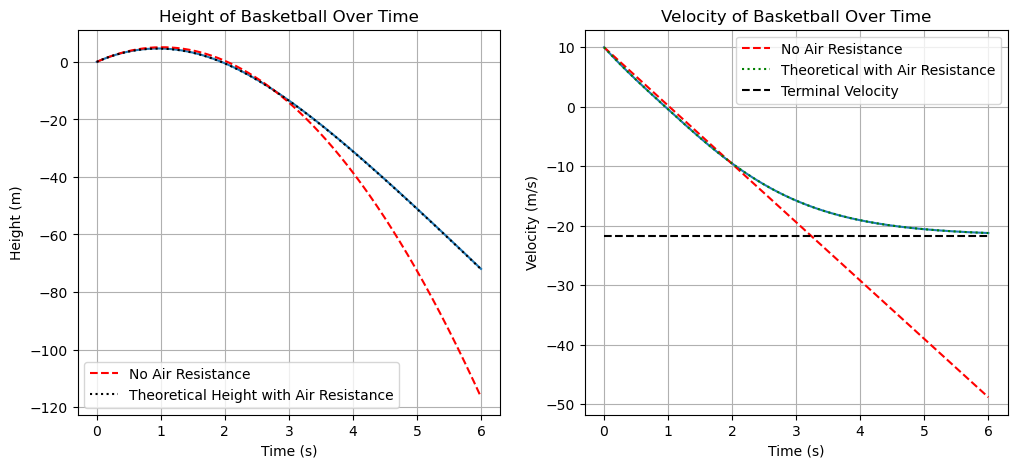

In [30]:
from scipy.integrate import odeint
import numpy as np

# Simulating a basketball thrown right up in the air
g = 9.81  # Acceleration due to gravity (m/s^2)
c = 0.47  # Drag coefficient (kg/m)
R = 0.12  # Radius of the basketball (m)
rho = 1.225  # Air density (kg/m^3)
A = np.pi * R**2  # Cross-sectional area (m^2)
m = 0.625  # Mass of the basketball (kg)
c = 0.5 * c * rho * A / m  # Combined drag coefficient

def rhs(v, t, k):
    dvdt = - g - c * v**2 * np.sign(v)
    return dvdt

# Initial conditions
v0 = 10.0  # Initial velocity (m/s)
t = np.linspace(0, 6, 1000)
# Time array from 0 to the time it takes to reach the peak and fall back
v = np.array(odeint(rhs, v0, t, args=(c,))).flatten()
# Integrate the ODE
h = np.zeros_like(t)
for i in range(1, len(t)):
    h[i] = h[i-1] + v[i-1] * (t[i] - t[i-1])

# Model
tc = 1/np.sqrt(g * c) * np.arctan(v0 * np.sqrt(c / g))
v_th = np.zeros_like(t)
v_th[t <= tc] = np.sqrt(g / c) * np.tan( np.sqrt(g * c) * ( tc - t[t <= tc]) )
v_th[t > tc] = -np.sqrt(g / c) * np.tanh( np.sqrt(g * c) * (t[t > tc] - tc))

y_th = np.zeros_like(t)
y_th[t <= tc] = 1/c * np.log( np.cos( np.sqrt(g * c) * (t[t <= tc] - tc) ) / np.cos( np.sqrt(g * c) * tc ) )
y_th[t > tc] = -1/c * np.log( np.cos( np.sqrt(g * c) * tc ) * np.cosh( np.sqrt(g * c) * (t[t > tc] - tc) ) )

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(t, h)
ax[0].plot(t, v0 * t - 0.5 * g * t**2, 'r--', label='No Air Resistance')
ax[0].plot(t, y_th, 'k:', label='Theoretical Height with Air Resistance')

ax[0].legend()
ax[0].set_title('Height of Basketball Over Time')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Height (m)')
ax[0].grid()


ax[1].plot(t, v)
ax[1].plot(t, v0 - g * t, 'r--', label='No Air Resistance')
ax[1].plot(t, v_th, 'g:', label='Theoretical with Air Resistance')
ax[1].plot(t, -np.sqrt(g / c) * np.ones_like(t), 'k--', label='Terminal Velocity')
ax[1].legend()
ax[1].set_title('Velocity of Basketball Over Time')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].grid()
